In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pyodbc
from string import ascii_lowercase

In [3]:
sql_conn = pyodbc.connect('DRIVER={SQL Server};'
                            'SERVER=L_AAGDATIX;'
                            'DATABASE=DatixCRM;'
                            'Trusted_Connection=yes') 
query = "set transaction isolation level read uncommitted select b.description, c.description from DatixCRM.dbo.code_unit b join DatixCRM.dbo.incidents_main a on a.inc_unit = b.code join DatixCRM.dbo.code_specialty c on a.inc_specialty = c.code where a.inc_type='PAT' and a.inc_category='MEDIC' and a.inc_organisation='QA'"
df = pd.read_sql(query, sql_conn)
df.columns = ['division-care_group','specialty']
df.head()

,division-care_group,specialty
0,"Clinical Delivery Division - Critical Care, Th...",Orthopaedic
1,"Clinical Delivery Division - Critical Care, Th...",General Surgery
2,"Clinical Delivery Division - Critical Care, Th...",General Surgery
3,"Clinical Delivery Division - Critical Care, Th...",Upper GI Surgery
4,"Clinical Delivery Division - Critical Care, Th...",Neurology


In [4]:
df['division-care_group'] = df['division-care_group'].str.replace(' and ',' & ')
divider = df['division-care_group'].str.split(" Division - ",n=1,expand=True)
df['division'] = divider[0]
df['care_group'] = divider[1]
#df['division'] = df['division'].str.replace(' and ',' & ')
df.loc[df.division == 'Corporate Functions', 'care_group'] = 'Corporate Functions'
df = df[df['division-care_group'] != 'Corporate Functions']
df = df[df.care_group != 'Pathology']
df = df[df.care_group != 'Patient Administration Services']
#df.loc[df.division == 'Surgical & Outpatients', 'division'] = 'Surgical & Outpatients + Corporate Functions'
#df.loc[df.division == 'Corporate Functions', 'division'] = 'Surgical & Outpatients + Corporate Functions'

In [5]:
division_counts = df['division'].value_counts()
division_percentages = 100*division_counts/sum(division_counts.values)
division_labels = [str(i) for i in division_counts.index]
print(division_percentages)

Medicine & Urgent Care    46.158904
Networked Services        19.747945
Surgical & Outpatients    17.282192
Clinical Delivery         16.810959
Name: division, dtype: float64


In [6]:
df['division_sorted'] = pd.Categorical(df['division'], division_labels)
df = df.sort_values("division_sorted")
df.head()

,division-care_group,specialty,division,care_group,division_sorted
4585,Medicine & Urgent Care Division - Urgent Care,Acute Medical Unit,Medicine & Urgent Care,Urgent Care,Medicine & Urgent Care
3497,Medicine & Urgent Care Division - Older Person...,Acute Medicine for Older People,Medicine & Urgent Care,Older Persons Medicine,Medicine & Urgent Care
3496,Medicine & Urgent Care Division - Older Person...,Acute Medicine for Older People,Medicine & Urgent Care,Older Persons Medicine,Medicine & Urgent Care
3495,Medicine & Urgent Care Division - Older Person...,Acute Medicine for Older People,Medicine & Urgent Care,Older Persons Medicine,Medicine & Urgent Care
3494,Medicine & Urgent Care Division - Older Person...,Acute Medicine for Older People,Medicine & Urgent Care,Older Persons Medicine,Medicine & Urgent Care


In [7]:
care_group_labels = []
for i in division_counts.index:
    df_division = df[df.division == i]
    per_division_counts = df_division['care_group'].value_counts()
    care_group_labels += [str(i) for i in per_division_counts.index]
print(care_group_labels)

['Medicine', 'Urgent Care', 'Older Persons Medicine', "Women & Children's", 'Regional Cancer Centre', 'Renal & Transplantation', 'MSK / Head & Neck', 'Surgery', 'Private Patients Unit', 'Pharmacy', 'Critical Care, Theatres, Anaesthetics & HSDU', 'Imaging Radiology']


In [8]:
df['care_group_sorted'] = pd.Categorical(df['care_group'], care_group_labels)
df = df.sort_values(['division_sorted','care_group_sorted'])
df.head()

,division-care_group,specialty,division,care_group,division_sorted,care_group_sorted
2793,Medicine & Urgent Care Division - Medicine,General Medicine,Medicine & Urgent Care,Medicine,Medicine & Urgent Care,Medicine
2792,Medicine & Urgent Care Division - Medicine,General Medicine,Medicine & Urgent Care,Medicine,Medicine & Urgent Care,Medicine
2791,Medicine & Urgent Care Division - Medicine,Gastroenterology,Medicine & Urgent Care,Medicine,Medicine & Urgent Care,Medicine
2790,Medicine & Urgent Care Division - Medicine,Respiratory,Medicine & Urgent Care,Medicine,Medicine & Urgent Care,Medicine
2789,Medicine & Urgent Care Division - Medicine,Respiratory,Medicine & Urgent Care,Medicine,Medicine & Urgent Care,Medicine


In [43]:
care_group_counts = df['care_group'].value_counts()[df['care_group'].unique()]
care_group_percentages = 100*care_group_counts/sum(care_group_counts.values)
print(care_group_percentages)

Medicine                                        18.641096
Urgent Care                                     17.994521
Older Persons Medicine                           9.523288
Women & Children's                               9.665753
Regional Cancer Centre                           6.750685
Renal & Transplantation                          3.331507
MSK / Head & Neck                                9.358904
Surgery                                          7.342466
Private Patients Unit                            0.580822
Pharmacy                                        11.736986
Critical Care, Theatres, Anaesthetics & HSDU     4.131507
Imaging Radiology                                0.942466
Name: care_group, dtype: float64


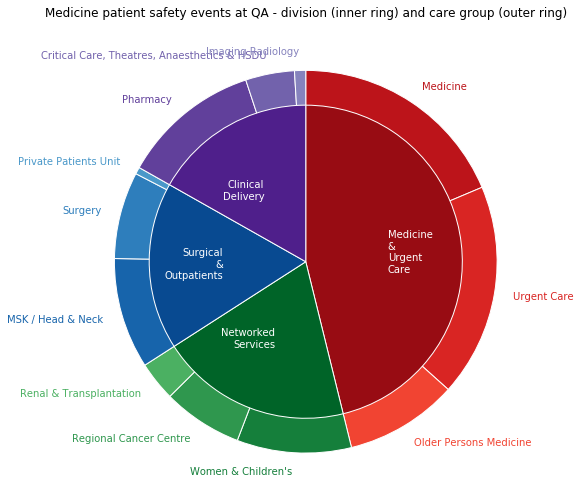

In [44]:
# Create colors
a, b, c, d, e =[plt.cm.Reds, plt.cm.Oranges, plt.cm.Greens, plt.cm.Blues, plt.cm.Purples]
a, c, d, e = [plt.cm.Reds, plt.cm.Greens, plt.cm.Blues, plt.cm.Purples]
inner_ring_colours = [plt.cm.Reds, plt.cm.Greens, plt.cm.Blues, plt.cm.Purples]

# First Ring (Inside)
fig, ax = plt.subplots()
ax.axis('equal')
division_labels_newlines = [i.replace(' ','\n') for i in division_labels]
#mypie, _ = ax.pie(division_counts, radius=2, labels=division_labels_newlines, labeldistance=0.6, colors=[a(0.9), b(0.9), c(0.9), d(0.9), e(0.9)], textprops={'color':'w'})
mypie, _ = ax.pie(division_counts, radius=1.9, labels=division_labels_newlines, labeldistance=0.5, colors=[inner_ring_colours[0](0.9), inner_ring_colours[1](0.9), inner_ring_colours[2](0.9), inner_ring_colours[3](0.9)], textprops={'color':'w'}, startangle=90, counterclock=False)
plt.setp( mypie, width=1.9, edgecolor='white')
 
# Second Ring (oUTside)
#care_group_colours = [a(0.8), a(0.7), a(0.6), a(0.5), b(0.8), c(0.8), c(0.7), c(0.6), d(0.8), d(0.7), d(0.6), e(0.8), e(0.7), e(0.6)]
care_group_colours = []
for i,index in enumerate(division_counts.index):
    df_division = df[df.division == index]
    per_division_counts = df_division['care_group'].value_counts()
    slice_colour = 8
    for j in range(len(per_division_counts)):
        care_group_colours.append(inner_ring_colours[i](slice_colour/10))
        slice_colour -= 1

mypie2, texts = ax.pie(care_group_counts, radius=2.2, labels=care_group_labels, colors=care_group_colours, startangle=90, counterclock=False)
plt.setp( mypie2, width=0.4, edgecolor='white')
for text, color in zip(texts, care_group_colours):
    text.set_color(color)
plt.margins(0,0)

plt.title('Medicine patient safety events at QA - division (inner ring) and care group (outer ring)', y=1.6);

In [45]:
specialty_counts = df['specialty'].value_counts()[df['specialty'].unique()]
print(specialty_counts.index)

Index(['General Medicine', 'Respiratory', 'Cardiology', 'Gastroenterology',
       'Acute Medical Unit', 'Administration Medicine Clinical Service Centre',
       'Diabetics and Endocrinology', 'Acute Medicine for Older People',
       'QA@Home Medicine', 'Vascular Services', 'Neurology', 'Pharmacy',
       'General Surgery', 'Urology', 'Neuro Rehabilitation', 'Dermatology',
       'Emergency Department', 'Nephrology/ Renal medicine', 'Pathology',
       'Acute Stroke', 'Administration Medicine for Older People',
       'Ear Nose and Throat', 'Theatres', 'Stroke Rehabilitation',
       'Plastic Surgery', 'Paediatrics', 'Orthopaedic',
       'Administration Emergency', 'Haematology', 'Oncology',
       'Emergency Surgery', 'Maxillofacial', 'Ophthalmology',
       'Hospital at Night', 'Rheumatology', 'Mental Health',
       'Colorectal Surgery', 'Occupational Therapy',
       'Rehabilitation Services (Orthotics)',
       'QA@Home Medicine for Older People', 'Obstetrics and Maternity', 'N

In [46]:
specialty_labels = []
for i in care_group_counts.index:
    df_care_group = df[df.care_group == i]
    per_care_group_counts = df_care_group['specialty'].value_counts()
    specialty_labels += [i + ' - ' + str(j) for j in per_care_group_counts.index]
print(specialty_labels)

['Medicine - General Medicine', 'Medicine - Respiratory', 'Medicine - Cardiology', 'Medicine - Gastroenterology', 'Medicine - Acute Medical Unit', 'Medicine - Administration Medicine Clinical Service Centre', 'Medicine - Diabetics and Endocrinology', 'Medicine - Acute Medicine for Older People', 'Medicine - QA@Home Medicine', 'Medicine - Vascular Services', 'Medicine - Neurology', 'Medicine - Pharmacy', 'Medicine - General Surgery', 'Medicine - Urology', 'Medicine - Neuro Rehabilitation', 'Medicine - Dermatology', 'Medicine - Emergency Department', 'Medicine - Nephrology/ Renal medicine', 'Medicine - Pathology', 'Medicine - Acute Stroke', 'Medicine - Administration Medicine for Older People', 'Medicine - Ear Nose and Throat', 'Medicine - Theatres', 'Medicine - Stroke Rehabilitation', 'Medicine - Plastic Surgery', 'Urgent Care - Acute Medical Unit', 'Urgent Care - Emergency Department', 'Urgent Care - General Medicine', 'Urgent Care - Acute Medicine for Older People', 'Urgent Care - Pae

In [47]:
df['care_group-specialty'] = df['care_group'] + ' - ' + df['specialty']
df['specialty_sorted'] = pd.Categorical(df['care_group-specialty'], specialty_labels)
df = df.sort_values(['division_sorted','care_group_sorted','specialty_sorted'])
df.head()

,division-care_group,specialty,division,care_group,division_sorted,care_group_sorted,care_group-specialty,specialty_sorted
2793,Medicine & Urgent Care Division - Medicine,General Medicine,Medicine & Urgent Care,Medicine,Medicine & Urgent Care,Medicine,Medicine - General Medicine,Medicine - General Medicine
2792,Medicine & Urgent Care Division - Medicine,General Medicine,Medicine & Urgent Care,Medicine,Medicine & Urgent Care,Medicine,Medicine - General Medicine,Medicine - General Medicine
2788,Medicine & Urgent Care Division - Medicine,General Medicine,Medicine & Urgent Care,Medicine,Medicine & Urgent Care,Medicine,Medicine - General Medicine,Medicine - General Medicine
2683,Medicine & Urgent Care Division - Medicine,General Medicine,Medicine & Urgent Care,Medicine,Medicine & Urgent Care,Medicine,Medicine - General Medicine,Medicine - General Medicine
2674,Medicine & Urgent Care Division - Medicine,General Medicine,Medicine & Urgent Care,Medicine,Medicine & Urgent Care,Medicine,Medicine - General Medicine,Medicine - General Medicine


In [48]:
specialty_counts = df['care_group-specialty'].value_counts()[df['care_group-specialty'].unique()]
specialty_percentages = 100*specialty_counts/sum(specialty_counts.values)

In [49]:
for specialty,percentage in specialty_percentages.iteritems():
    if percentage < 0.855827:
        df.loc[df['care_group-specialty'] == specialty, 'care_group-specialty'] = specialty.split(" - ")[0] + ' - Other'

In [50]:
specialty_counts = df['care_group-specialty'].value_counts()[df['care_group-specialty'].unique()]
print(specialty_counts)
specialty_percentages = 100*specialty_counts/sum(specialty_counts.values)
specialty_labels_split = specialty_counts.index.str.split(" - ",n=1)
specialty_labels = [el[1] for el in specialty_labels_split]
print(specialty_percentages)

Medicine - General Medicine                                     501
Medicine - Respiratory                                          444
Medicine - Cardiology                                           416
Medicine - Gastroenterology                                     254
Medicine - Other                                                 86
Urgent Care - Acute Medical Unit                                841
Urgent Care - Emergency Department                              603
Urgent Care - Other                                             198
Older Persons Medicine - Acute Medicine for Older People        557
Older Persons Medicine - Acute Stroke                           162
Older Persons Medicine - Other                                  150
Women & Children's - Obstetrics and Maternity                   330
Women & Children's - NICU                                       223
Women & Children's - Paediatrics                                202
Women & Children's - Other                      

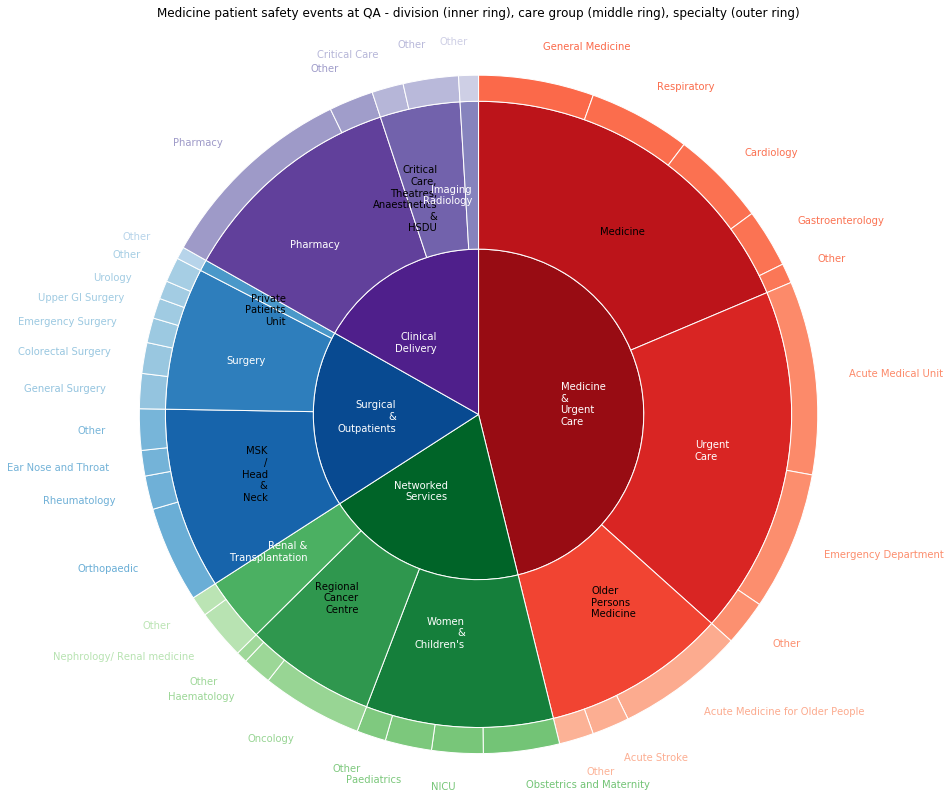

In [52]:
# Create colors
a, b, c, d, e =[plt.cm.Reds, plt.cm.Oranges, plt.cm.Greens, plt.cm.Blues, plt.cm.Purples]
a, c, d, e = [plt.cm.Reds, plt.cm.Greens, plt.cm.Blues, plt.cm.Purples]
division_colour_dict = {'Medicine & Urgent Care':plt.cm.Reds, 'Networked Services':plt.cm.Greens, 'Surgical & Outpatients':plt.cm.Blues, 'Clinical Delivery':plt.cm.Purples}
inner_ring_colours = [division_colour_dict[division] for division in division_labels]

# First Ring (Inside)
fig, ax = plt.subplots()
ax.axis('equal')
division_labels_newlines = [i.replace(' ','\n') for i in division_labels]
#mypie, _ = ax.pie(division_counts, radius=2, labels=division_labels_newlines, labeldistance=0.6, colors=[a(0.9), b(0.9), c(0.9), d(0.9), e(0.9)], textprops={'color':'w'})
mypie, _ = ax.pie(division_counts, radius=1.9, labels=division_labels_newlines, labeldistance=0.5, colors=[a(0.9), c(0.9), d(0.9), e(0.9)], textprops={'color':'w'}, startangle=90, counterclock=False)
plt.setp( mypie, width=1.9, edgecolor='white')
 
# Second Ring (oUTside)
care_group_labels_newlines = [i.replace(' ','\n') for i in care_group_labels]
care_group_labels_newlines[care_group_labels_newlines.index('Renal\n&\nTransplantation')] = 'Renal &\nTransplantation'
#care_group_labels_newlines[care_group_labels_newlines.index('Critical\nCare,\nTheatres,\nAnaesthetics\n&\nHSDU')] = 'Critical Care, Theatres,\nAnaesthetics\n& HSDU'
#care_group_labels_newlines[care_group_labels_newlines.index('Imaging\nRadiology')] = 'Imaging Radiology'
#care_group_colours = [a(0.8), a(0.7), a(0.6), a(0.5), b(0.8), c(0.8), c(0.7), c(0.6), d(0.8), d(0.7), d(0.6), e(0.8), e(0.7), e(0.6)]
care_group_colours = [a(0.8), a(0.7), a(0.6), c(0.8), c(0.7), c(0.6), d(0.8), d(0.7), d(0.6), e(0.8), e(0.7), e(0.6)]
care_group_colours = []
for i,index in enumerate(division_counts.index):
    df_division = df[df.division == index]
    per_division_counts = df_division['care_group'].value_counts()
    slice_colour = 8
    for j in range(len(per_division_counts)):
        care_group_colours.append(inner_ring_colours[i](slice_colour/10))
        slice_colour -= 1
mypie2, texts = ax.pie(care_group_counts, radius=3.6, labels=care_group_labels_newlines, labeldistance=0.7, colors=care_group_colours, textprops={'color':'k'},startangle=90, counterclock=False)
plt.setp( mypie2, width=1.7, edgecolor='white')
care_group_label_colours = ['k' if i%2==0 else 'w' for i in range(len(care_group_counts))]
for text, color in zip(texts, care_group_label_colours):
    text.set_color(color)
plt.margins(0,0)

# Third Ring (oUTside)
specialty_colours = [a(0.5),a(0.49),a(0.48),a(0.47),a(0.4),a(0.39),a(0.38),a(0.37),a(0.36),a(0.35),a(0.34),a(0.33),a(0.32),a(0.31),a(0.30),a(0.29),a(0.28),a(0.27),a(0.26),a(0.25),a(0.24),c(0.50),c(0.49),c(0.48),c(0.47),c(0.46),c(0.45),c(0.40),c(0.39),c(0.38),c(0.37),c(0.36),c(0.30),c(0.29),c(0.28),c(0.27),d(0.50),d(0.40),d(0.39),d(0.38),d(0.37),d(0.30),e(0.50),e(0.49),e(0.48),e(0.47),e(0.46),e(0.45),e(0.44),e(0.40),e(0.39),e(0.38),e(0.37)]
specialty_colours = []
for i,div_index in enumerate(division_counts.index):
    df_division = df[df.division == div_index]
    slice_colour_orig = 0.5
    division_care_group_counts = df_division['care_group'].value_counts()[df_division['care_group'].unique()]
    for j,care_index in enumerate(division_care_group_counts.index):
        df_care_group = df_division[df_division['care_group-specialty'].str.startswith(care_index)]
        per_care_group_counts = df_care_group['care_group-specialty'].value_counts()[df_care_group['care_group-specialty'].unique()]
        slice_colour = slice_colour_orig - j/10
        for k in per_care_group_counts:
            specialty_colours.append(inner_ring_colours[i](slice_colour))
            slice_colour -= 0.01
mypie3, texts = ax.pie(specialty_counts, radius=3.9, labels=specialty_labels, colors=specialty_colours, startangle=90, counterclock=False)
plt.setp( mypie3, width=0.3, edgecolor='white')
for text, color in zip(texts, specialty_colours):
    text.set_color(color)
plt.margins(0,0)

plt.title('Medicine patient safety events at QA - division (inner ring), care group (middle ring), specialty (outer ring)', y=2.3);